### Determinants:

1) Help us in mapping a square matrix with a scalar.<br>
2) They determine whether a square matrix can be inverted or not.

#### For a matrix X, determinant of X is denoted by det(X)
* If the determinant of a matrix is 0, it cannot be inverted.
* The matrices having determinant 0 are called singular matrices. Such matrices contain linearly dependent columns.

### 2x2 Matrix Determinants

In [38]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [4]:
np.linalg.det(X)

-2.0000000000000004

In [5]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [6]:
np.linalg.det(N)

0.0

In [7]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [8]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [9]:
torch.det(N) 

tensor(0.)

#### For a matrix [[a, b], [c, d]], the determinant is given by ad - bc, let's confirm this with an example.

In [10]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [11]:
round(np.linalg.det(X)) == (-3 * 4) - (-5 * 2)

True

### Generalizing Determinants

In [12]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [13]:
np.linalg.det(X)

19.999999999999996

In [14]:
round(np.linalg.det(X)) == 1 * ((1 * -1) - (5 * 3)) - 2 * ((1 * 2) - (0 * 3)) + 4 * ((5 * 2) - (0 * -1))

True

#### Similarly determinant of any matrix can be calculated, given the matrix is square.

### Exercises:
1) Determinant of [[25, 2],[3, 4]], and whether it is a singular matrix

In [16]:
X = np.array([[25, 2], [3, 4]])
X

array([[25,  2],
       [ 3,  4]])

In [18]:
det_X = np.linalg.det(X)
det_X

94.0

det(X) is not 0, hence the matrix isn't singular.

In [19]:
X = np.array([[-2, 0], [0, -2]])
X

array([[-2,  0],
       [ 0, -2]])

In [20]:
det_X = np.linalg.det(X)
det_X

4.0

det(X) is not 0, hence the matrix isn't singular.

In [22]:
X = np.array([[2, 1, -3], [4, -5, 2], [0, -1, 3]])
X

array([[ 2,  1, -3],
       [ 4, -5,  2],
       [ 0, -1,  3]])

In [23]:
det_X = np.linalg.det(X)
det_X

-26.000000000000014

det(X) is not 0, hence the matrix isn't singular.

### Determinants & Eigenvalues

#### The determinant is the product of all the eigenvalues. This is because the determinant of X represents the change in area/volume when X is applied to some other vector/matrix/tensor. For eg. In a 2X2 matrix, the Eigenvalues reprsent how much theEigenvectors have scaled, in each dimension and determinant represents the how much has the area scaled. Thus, the Determinant is equal to the product of all Eigenvalues. Similarly in 3 dimensions, the determinant represents the change in Volume.

In [24]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-5.10785648,  1.35711931,  3.75073717])

In [28]:
round(np.product(lambdas))

-26

In [30]:
round(np.linalg.det(X))

-26

Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values: 

In [32]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

In [34]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [39]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

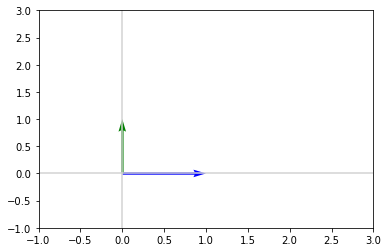

In [41]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Let's start by applying the matrix $N$ to $B$, recalling from earlier that $N$ is singular: 

In [42]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [43]:
np.linalg.det(N)

0.0

In [44]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

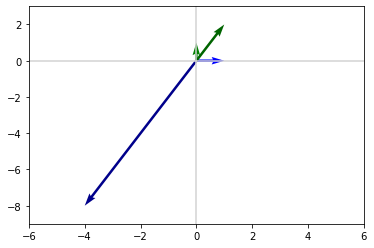

In [45]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['blue', 'green', 'darkblue', 'darkgreen'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In the previous figure, the square that was formed by the basis vectors would have given us an area of 1. Here, since the determinant of this matrix is 0, the area of the tranformed matrix would be zero. We can confirm that by the above image, both the vectors lie on the same line and the are of this line is 0.

In [46]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

Since one of the Eigenvalues is 0, one Eigenvector must have become 0 after transormation, hence the are is 0, Determinants = Product of Eigenvectors also holds true.

Now let's try applying $I_2$ to $B$: 

In [50]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [51]:
np.linalg.det(I)

1.0

In [52]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

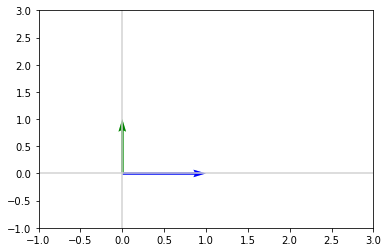

In [53]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Here the determinant is 1, so the area does not change, but this is a special case where, even the vectors did not change, so the are had to remain same. Let's confirm that the product of the eigen values is also 1.

In [54]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix $J$ which is more interesting: 

In [55]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [56]:
np.linalg.det(J)

-1.0

In [57]:
np.abs(np.linalg.det(J))

1.0

In [59]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

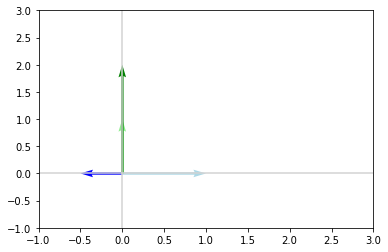

In [60]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Here, area of the squaure formed by the basic vectors and the rectangle formed by the transformed matrix are the same. Let's confirm this by comfirming,  the absolute value of the product of Eigenvectors is 1.

In [61]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

In [63]:
np.abs(np.product(lambdas))

1.0

Finally, let's apply the matrix $D$, which scales vectors by doubling along both the $x$ and $y$ axes: 

In [64]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [67]:
np.linalg.det(D)

4.0

In [68]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

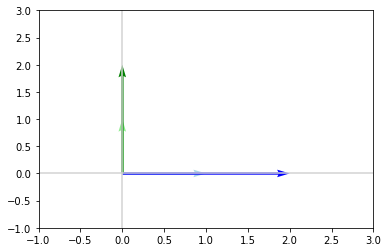

In [69]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Here the area becomes 4 times, it is quite obvious from the figure. Let's confirm once again with the Eigenvalues.

In [70]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

In [71]:
np.abs(np.product(lambdas))

4.0